# Exploratory Data Analysis of the Forest Fires Data Set

**Note**: The pdf format of EDA is available in ../doc/EDA.pdf.

## Summary of the data set

The data used in the project contains information about the burnt areas of forest fires located in the northeast region of Portugal created by Cortez and Morais (2007). The data source is from the UCI Machine Learning Repository (Dua and Graff 2017) and can be accessed [here](https://archive.ics.uci.edu/ml/datasets/forest+fires). There are 517 observations and 13 rows in the data, and there are no missing values in the dataset. Each row represents one fire monitoring instance, with the column area as our target (showing the burned area), and 12 other meaurements and indexes as features (including month, day, RH, rain, DC, ISI etc).

For the exploratory data analysis, we try to follow the EDA checklist in chapter 4 of the [Art of Data Science](https://leanpub.com/artofdatascience).



---

## 1. Formulate your question

Can we predict the burned areas of forests using meteorological observations, soil moisture indices, and locational data?

---

## 2. Read in the data

In [1]:
import pandas as pd
import numpy as np
import altair as alt
from sklearn.model_selection import train_test_split
alt.renderers.enable("mimetype")

RendererRegistry.enable('mimetype')

In [2]:
forest_data = pd.read_csv("../data/raw/forestfires.csv")
forest_data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


---

## 3. Check the packaging

In this section, we check the packaging of the data to get some information about the data.

In [3]:
# Number of columns and rows
forest_data.shape

(517, 13)

There are 517 observations and 13 columns.

In [4]:
# Information for each column
forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


By using `info()`, we get information about the data including the names of each column, non-null values, the data types of each column and the memory usage.

In [5]:
# Missing values for ecah column
forest_data.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

We see that our data does not contain any missing values.

---

## 4. Looking at the top and the bottom of the data

After checking the packaging, it is useful to look at the beginning and end of the dataset. This allows us to know if the data was read in properly and if things are properly formatted.

In [6]:
forest_data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [7]:
forest_data.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


---

## 5. Check the "n"s

In this section, we check counts and unique values of the categorical variables and calculate some summary statistics for the numerical columns.

Before we start, we split our data into 80% training and 20% testing sets and will only perform the exploratory data analysis on the training portion of our data.

In [8]:
# split data into training and testing
train_set, test_set = train_test_split(
    forest_data, test_size = 0.2, random_state = 123
)

In [9]:
# number of observations in the training set
train_set.shape

(413, 13)

We have 413 observations and 13 columns in the training set.

We start by counting the unique values in categorical columns. We can see that the x-axis spatial coordinate within the Montesinho park (X) ranges from 1 to 9. The y-axis spatial coordinate within the Montesinho park (Y) ranges from 2 to 9, however there is no y-coordinate of 7.

In [10]:
train_set["X"].value_counts()

6    74
4    71
2    56
7    49
8    46
3    46
1    40
5    24
9     7
Name: X, dtype: int64

In [11]:
train_set["Y"].value_counts() 

4    164
5    104
6     53
3     52
2     37
9      2
8      1
Name: Y, dtype: int64

Next, we count the unique values in month and day. We can see that majority of the observations are in the months of August and September. Moreover, the data has more observations during the weekends compared to the weekdays.

In [12]:
train_set["month"].value_counts() 

aug    149
sep    138
mar     45
jul     22
feb     17
jun     13
oct     12
apr      8
dec      6
jan      1
nov      1
may      1
Name: month, dtype: int64

In [13]:
train_set["day"].value_counts() # Mostly during weekend

sun    73
fri    70
sat    69
mon    57
thu    51
tue    48
wed    45
Name: day, dtype: int64

Next, we calculate some summary statistics of our data. We can see the ranges of values, as well as the means and standard deviations.

In [14]:
# summary statistics
train_set.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,4.629540,4.237288,90.771429,109.854237,546.031235,8.971671,18.819613,44.353511,4.085714,0.026634,13.868329
std,2.278178,1.164551,4.655424,63.576254,251.835608,4.581362,5.789594,16.476107,1.813679,0.330882,69.842730
min,1.000000,2.000000,50.400000,2.400000,7.900000,0.400000,4.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,61.100000,433.300000,6.400000,15.400000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.700000,108.000000,664.500000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,6.000000,5.000000,92.900000,141.300000,713.900000,10.700000,22.900000,53.000000,5.400000,0.000000,6.580000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,99.000000,9.400000,6.400000,1090.840000


Here, we calculate the correlation matrix for the numerical columns of our data. From the summary statistics above, we can see that many of the columns contain outliers, and thus we do not use the default method of the `corr()` function (Pearson's correlation coefficient), as it is very sensitive to outliers. We use the Spearman's rank correlation coefficient, as it is more robust to the effect of outliers. 

In [15]:
# Correlation matrix
train_set.corr(method = 'spearman') 

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.462903,-0.036634,-0.063781,-0.062645,0.000960,-0.091185,0.110238,0.054414,0.115815,0.116381
Y,0.462903,1.000000,0.058250,0.017757,-0.085801,0.034649,-0.030783,0.040472,-0.001240,0.072720,0.052622
FFMC,-0.036634,0.058250,1.000000,0.523017,0.257547,0.776041,0.613044,-0.330960,-0.049079,0.121794,0.058037
DMC,-0.063781,0.017757,0.523017,1.000000,0.566408,0.429883,0.535974,0.017812,-0.121018,0.121047,0.082359
DC,-0.062645,-0.085801,0.257547,0.566408,1.000000,0.094943,0.316728,0.041631,-0.231783,0.023028,0.074541
ISI,0.000960,0.034649,0.776041,0.429883,0.094943,1.000000,0.426436,-0.190883,0.113262,0.122755,0.051099
temp,-0.091185,-0.030783,0.613044,0.535974,0.316728,0.426436,1.000000,-0.496152,-0.164380,0.054985,0.091627
RH,0.110238,0.040472,-0.330960,0.017812,0.041631,-0.190883,-0.496152,1.000000,0.011832,0.182781,-0.050826
wind,0.054414,-0.001240,-0.049079,-0.121018,-0.231783,0.113262,-0.164380,0.011832,1.000000,0.110012,0.052180
rain,0.115815,0.072720,0.121794,0.121047,0.023028,0.122755,0.054985,0.182781,0.110012,1.000000,-0.058119


---

## 6. Making plots

In this section, we make plots to further our understanding of data.

### Dependent Variable (area)

We start by plotting our target variable (the burnt area of the forest).

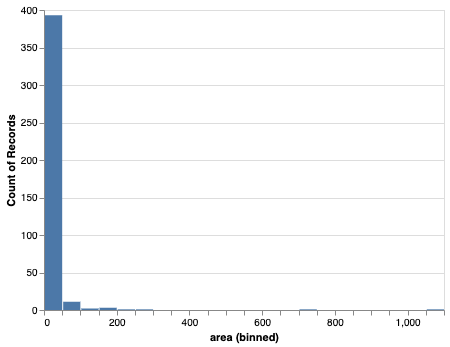

In [16]:
alt.Chart(train_set).mark_bar().encode(
    alt.X("area", bin = alt.Bin(maxbins = 30)),
    y = "count()"
) 

**Fig. 1** Histogram of the burnt area of the forest

From figure 1, we see that the target variable is highly skewed, and there are many observations with burnt area of 0. As a result, we apply log transformation to the target variable.

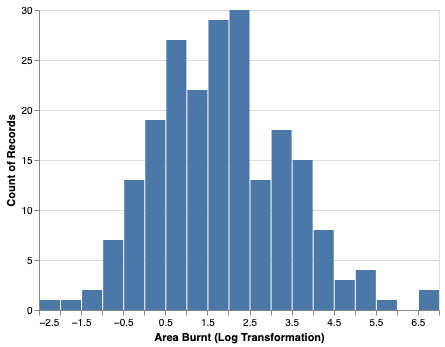

In [17]:
# log transformation
train_set["log_area"] = np.log(train_set["area"].replace(0, np.nan))

alt.Chart(train_set).mark_bar().encode(
    alt.X("log_area", 
           bin = alt.Bin(maxbins = 20),
           title = "Area Burnt (Log Transformation)"),
    y = alt.Y("count()")
) 

**Fig 2.** Histogram of the burnt area of the forest (log transformed)

From figure 2, we see that after log transforming the target variable, the target variable looks approximately normal.

### Predictors

After examining the target variable, we explore our categorical and numerical variables.

#### Categorical Columns

As discussed earlier, may of the observations have a burnt area of 0, and consequently for visualization purposes, we apply a square root transformation to the area burnt for the visualization of the categorical variables.

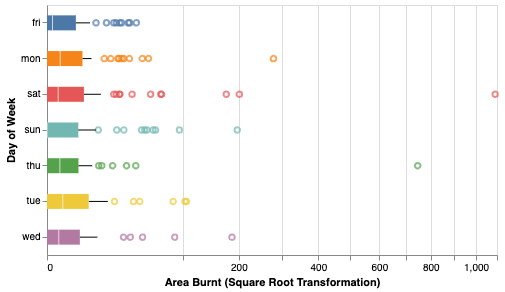

In [18]:
alt.Chart(train_set).mark_boxplot(size = 15).encode(
    x = alt.X("area", 
              scale = alt.Scale(type = "sqrt"),
              title = "Area Burnt (Square Root Transformation)"),
    y = alt.Y("day", 
              sort = "x",
              title = "Day of Week"),
    color = alt.Color("day",
                      legend = None)
).properties(
    height = 250,
    width = 450
)

**Fig 3.** Boxplots of burnt areas of the forest (sqrt transformed) per day of the week  

Figure 3 shows that there is no clear relationship between the burnt area of the forest and the days of the week.

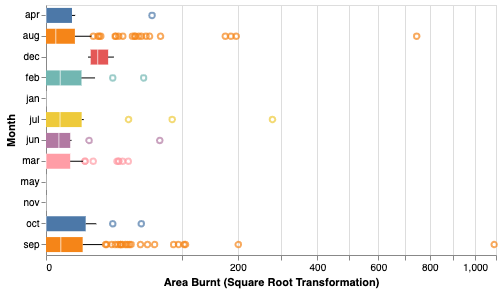

In [19]:
alt.Chart(train_set).mark_boxplot(size = 15).encode(
    x = alt.X("area", 
              scale = alt.Scale(type = "sqrt"),
              title = "Area Burnt (Square Root Transformation)"),
    y = alt.Y("month", 
              sort = "x",
              title = "Month"),
    color = alt.Color("month",
                      legend = None)
).properties(
    height = 250,
    width = 450   
)

**Fig 4.** Boxplots of burnt areas of the forest (sqrt transformed) per month

Figure 4 shows that some months such as January, May and November do not have many observations, and since the month variable is unbalanced, to avoid overfitting, we create a `season` variable.

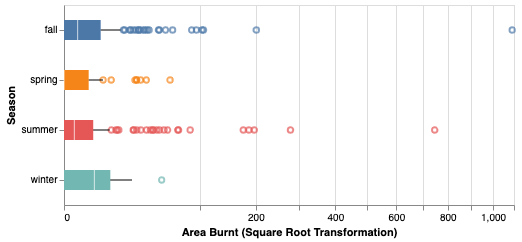

In [20]:
season_mapping = {
    "dec" : "winter",
    "jan" : "winter",
    "feb" : "winter",
    "mar" : "spring",
    "apr" : "spring",
    "may" : "spring",
    "jun" : "summer",
    "jul" : "summer", 
    "aug" : "summer",
    "sep" : "fall",
    "oct" : "fall",
    "nov" : "fall"
}
train_set["season"] = train_set["month"].map(season_mapping)

alt.Chart(train_set).mark_boxplot(size = 20).encode(
    x = alt.X("area", 
              scale = alt.Scale(type = "sqrt"),
              title = "Area Burnt (Square Root Transformation)"),
    y = alt.Y("season", 
              sort = "x",
              title = "Season"),
    color = alt.Color("season",
                      legend = None)
).properties(
    height = 200,
    width = 450
)

**Fig 5.** Boxplots of burnt areas of the forest (sqrt transformed) per season

From figure 5, we can see that there is a distinction between the burnt areas of forest and seasons.

#### Numeric Columns

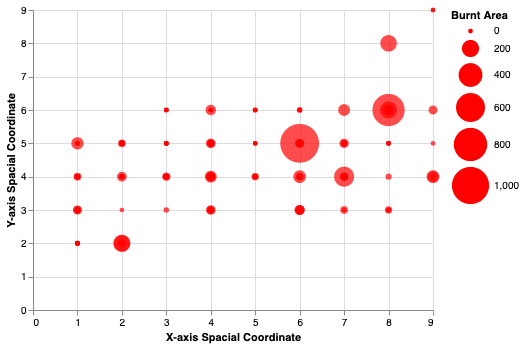

In [21]:
alt.Chart(train_set).mark_circle().encode(
    x = alt.X("X",
              title = "X-axis Spacial Coordinate"),
    y = alt.Y("Y",
              title = "Y-axis Spacial Coordinate"),
    size = alt.Size("area",
                    scale = alt.Scale(range = (20, 1500)),
                    title = "Burnt Area")
).configure_mark(
    color = "red",
    opacity = 0.7
)

**Fig 6.** Location of the burnt areas of the forest

Figure 6 shows the location and size of the burnt areas in the forest. We see the different locations of the park have experienced different extents of areas burnt. We can see that some areas of the forest have definitely experienced larger fires. In particular coordinates of (6, 5) and (8, 6) stand out.

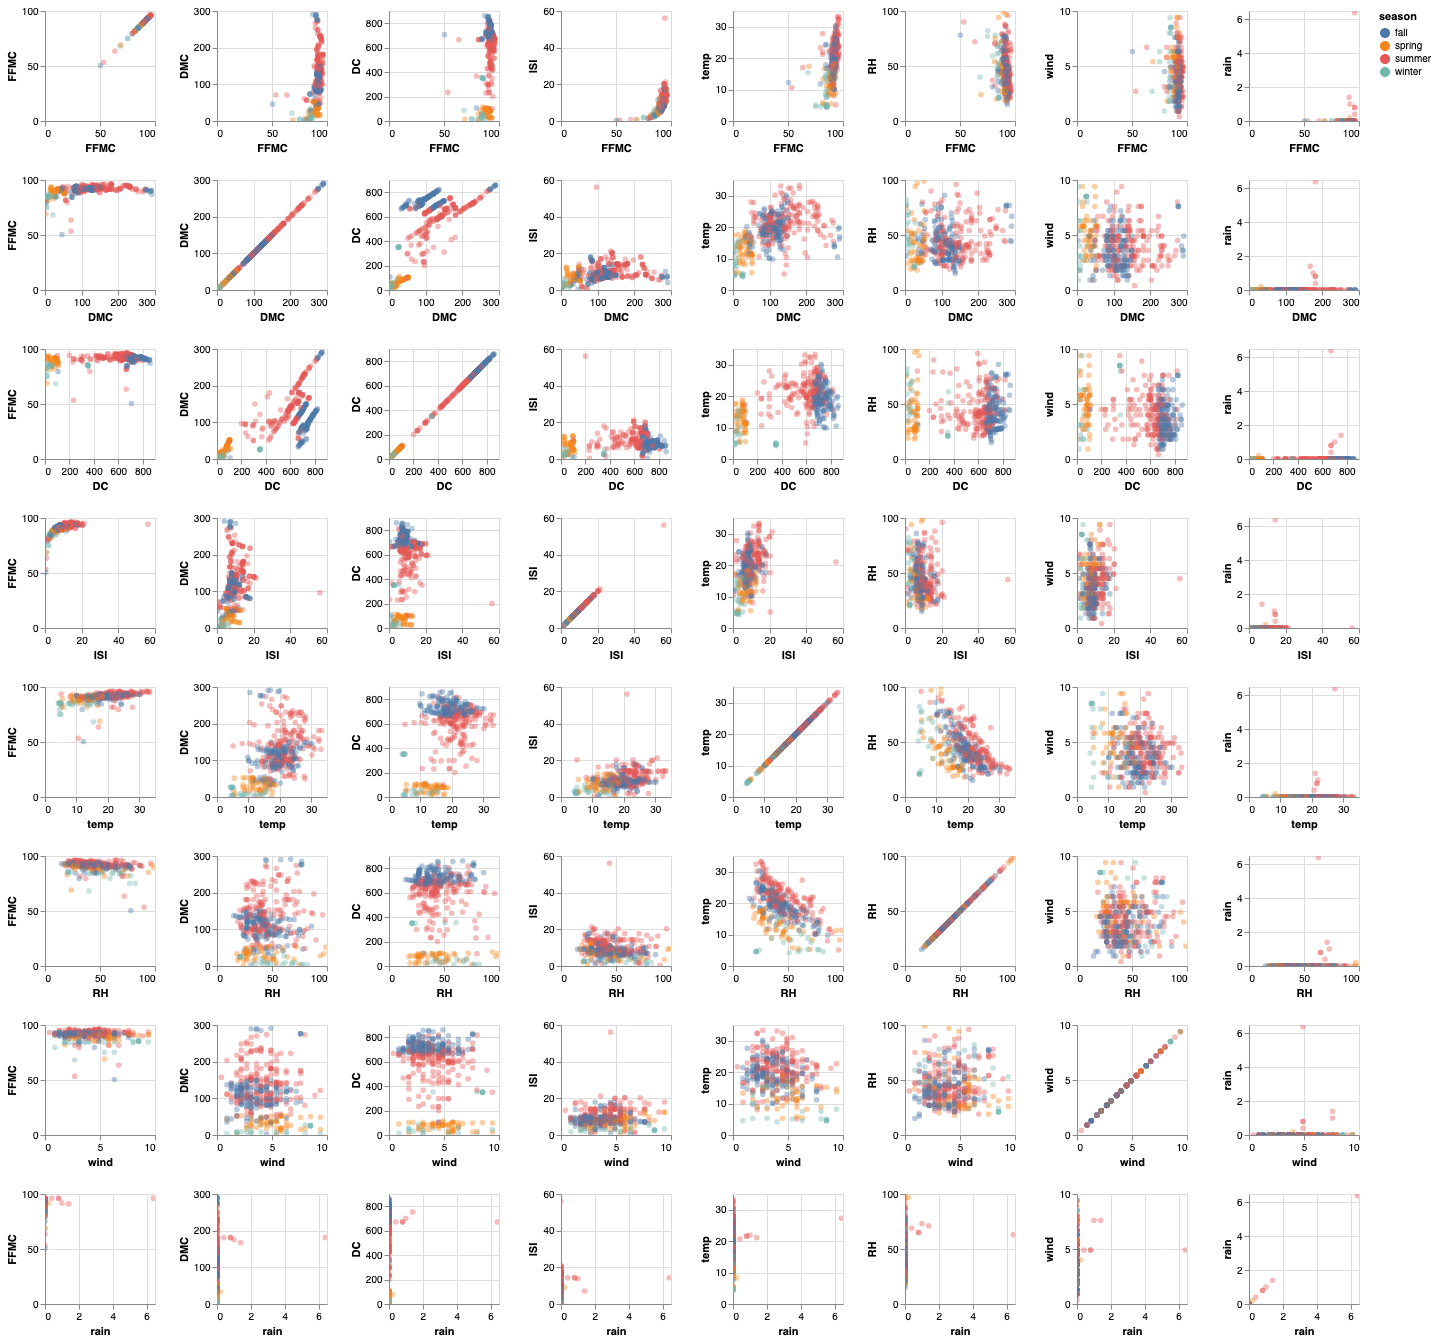

In [22]:
alt.Chart(train_set).mark_circle().encode(
    x = alt.X(alt.repeat("row"), type = "quantitative"),
    y = alt.Y(alt.repeat("column"), type = "quantitative"),
    color = "season"
).properties(
    width = 110,
    height = 110
).repeat(
    column = ["FFMC", "DMC", "DC", "ISI", "temp", "RH", "wind", "rain"],
    row = ["FFMC", "DMC", "DC", "ISI", "temp", "RH", "wind", "rain"]
).configure_mark(
    opacity = 0.4
).interactive()


**Fig 7.** Pairwise relationships between numerical variables per season

Figure 7 plots the pairwise relationships between the numerical variables of the dataset. This plot shows the patterns between the numerical variables and reveals the outliers in the data. For example, the variables such as `FFMC`, `DMC`, `DC`, `ISI` and `rain` contain outliers. This suggests that we need to keep this in mind and deal with the outliers when making our model. 

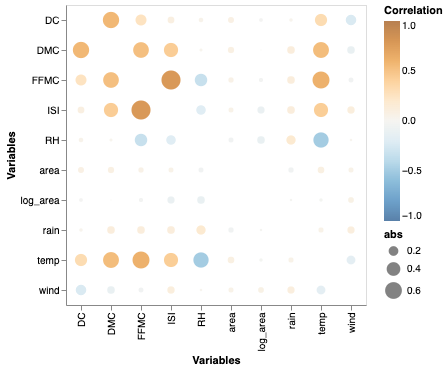

In [23]:
train_df_numeric = train_set.drop(["X", "Y", "month", "day"], axis=1)

corr_df = train_df_numeric.corr("spearman").stack().reset_index(name="corr")
corr_df.loc[corr_df["corr"] == 1, "corr"] = 0
corr_df["abs"] = corr_df["corr"].abs()

(
    alt.Chart(corr_df)
    .mark_circle()
    .encode(x = alt.X("level_0", title = "Variables"),
            y = alt.Y("level_1", title = "Variables"),
            size = "abs",
            color = alt.Color('corr',
                               scale = alt.Scale(scheme = 'blueorange',
                                                 domain = (-1, 1)),
                               title = "Correlation"))
).properties(
    width = 300,
    height = 300
)

**Fig 8.** Correlation heatmap for numerical variables

Figure 8 shows the correlations between the numerical variables of our data. We can see that some variables seem to be correlated to each other. For example, The correlations between `ISI` and `FFMC` or the correlation between `DMC` and `DC` seem to be somewhat high. Again, we need to keep this in mind when making our model.

---

## 7. Conclusion

We have performed exploratory data analysis to gain insight about our data. We have found that our target variable is highly skewed, however after applying a log transformation, the target looks approximately normal. Therefore, we will use the log transformed target in our model. Moreover, we have found that the days of the week might not help us with the prediction of the burnt areas of the forest, and since some months had no observations, we created a seasons variable that can help us with the prediction. Furthermore, we have detected patterns amongst our numerical predictors, however we have to be mindful of outliers and high correlations between our predictors when making our prediction model.

---

## 8. References

Dua, Dheeru, and Casey Graff. 2017. “UCI Machine Learning Repository.” University of California, Irvine, School of Information; Computer Sciences. http://archive.ics.uci.edu/ml.

P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data. In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artificial Intelligence, Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, December, Guimaraes, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9.